In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import argparse
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/gdrive",)

Mounted at /content/gdrive


In [8]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Image and Video class/Edge Detection')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/Colab Notebooks/Image and Video class/Edge Detection
/content/gdrive/My Drive/Colab Notebooks/Image and Video class/Edge Detection


In [9]:
def plt_imshow(title, image):

  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.axis("Off")
  plt.grid(False)
  plt.show()

In [10]:
args = {
    "image":"building.jpg",
    "image1" : "House.jpg",
    "image2":"csbldg.jpg",
    "image3":"gates.png"
}

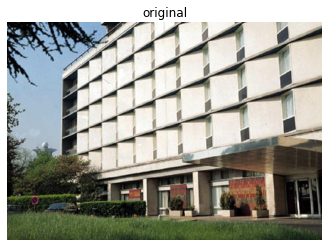

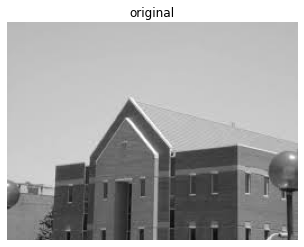

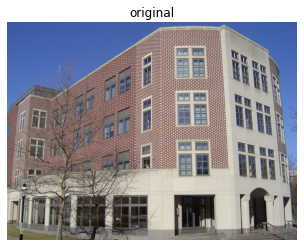

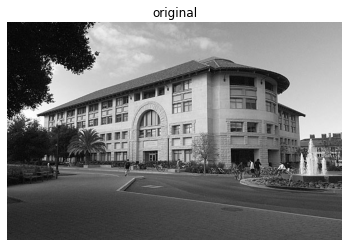

In [11]:
image = cv2.imread(args["image"])
image1 = cv2.imread(args["image1"])
image2 = cv2.imread(args["image2"])
image3 = cv2.imread(args["image3"])
plt_imshow("original",image)
plt_imshow("original",image1)
plt_imshow("original",image2)
plt_imshow("original",image3)

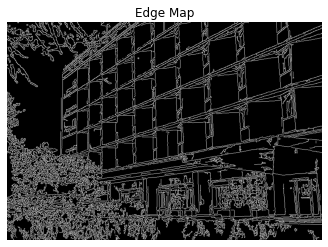

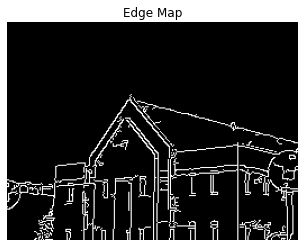

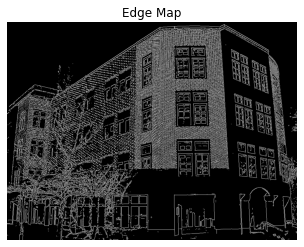

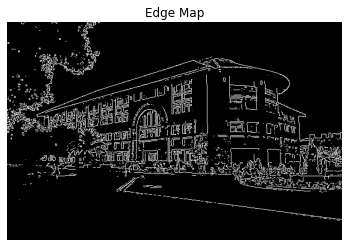

In [12]:
canny = cv2.Canny(image, 30, 150)
canny1 = cv2.Canny(image1, 40, 150)
canny2 = cv2.Canny(image2, 200, 210)
canny3 = cv2.Canny(image3, 240, 250)
plt_imshow("Edge Map", canny)
plt_imshow("Edge Map", canny1)
plt_imshow("Edge Map", canny2)
plt_imshow("Edge Map", canny3)

In [13]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Colab Notebooks/Image and Video class/small sample')
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/My Drive/Colab Notebooks/Image and Video class/small sample
/content/gdrive/My Drive/Colab Notebooks/Image and Video class/small sample


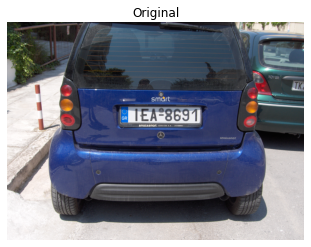

In [14]:
args={
    "image":"HPIM1252.JPG"
}
image=cv2.imread(args["image"])
plt_imshow("Original",image)

In [15]:
img = cv2.resize(image, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = cv2.bilateralFilter(gray, 11, 17, 17)

edged = cv2.Canny(gray, 30, 200)
nts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(nts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None


for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:
      screenCnt = approx
      break

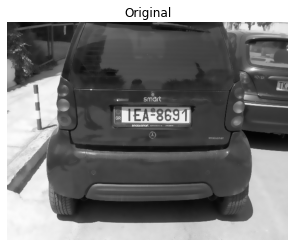

In [16]:
plt_imshow("Original",gray)

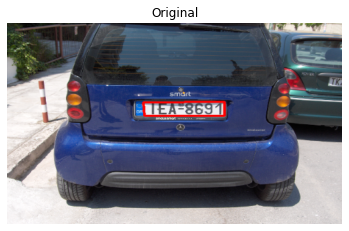

In [17]:
n_img=cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
n_img =cv2.resize(n_img,(500,300))
plt_imshow("Original",n_img)